# Titanic Dataset Survival Prediction
### Decision_Tree_Classifier and Random_Forest_Classifier 

#### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold
from sklearn. model_selection import cross_val_score

#### Load Datasets

In [2]:
train = pd.read_csv("dataset/train.csv")
test = pd.read_csv("dataset/test.csv")

In [3]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape


(891, 12)

In [5]:
test.shape

(418, 11)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### Name, Sex, Cabin, Embarked are object type
##### Age, Cabin, Embarked have missing values

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### Create function for Bar_Chart display 

In [8]:
%matplotlib inline  
sns.set()           #load seaborn's default theme

def bar_chart(feature):
    survived = train[train['Survived']==1] [feature].value_counts()
    dead = train[train['Survived']==0] [feature].value_counts()
    
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    
    df.plot(kind = 'bar')

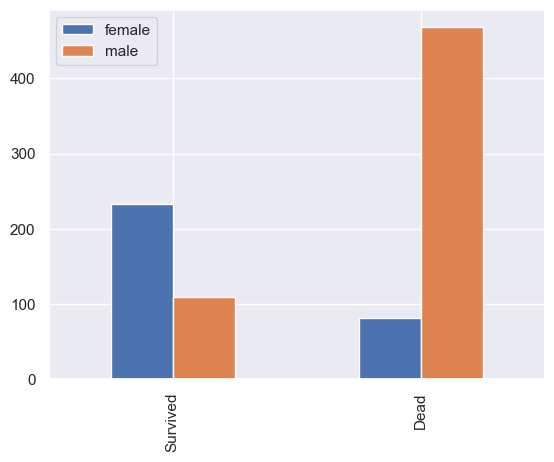

In [9]:
bar_chart('Sex')

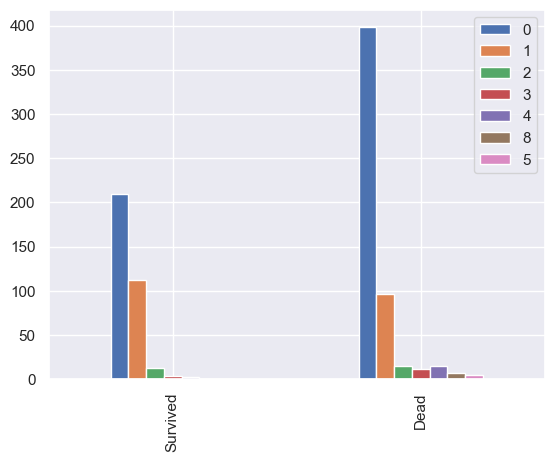

In [10]:
bar_chart('SibSp')  #siblings or spouse

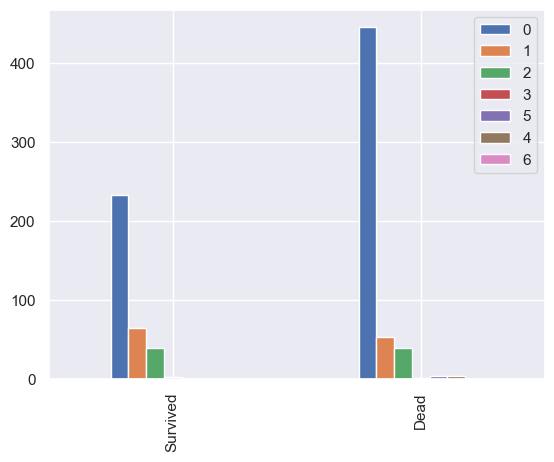

In [11]:
bar_chart('Parch')  #parents and children

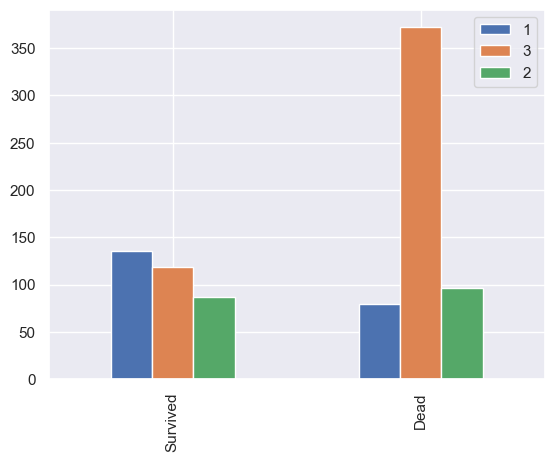

In [12]:
bar_chart('Pclass')

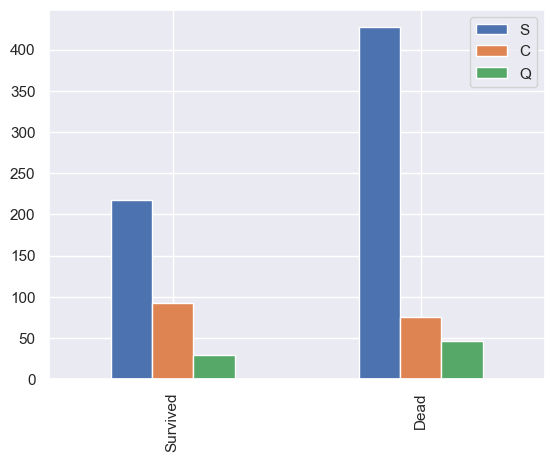

In [13]:
bar_chart('Embarked')

#### Creating Subplot and Visualizing using Pie Plot & Bar Chart

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


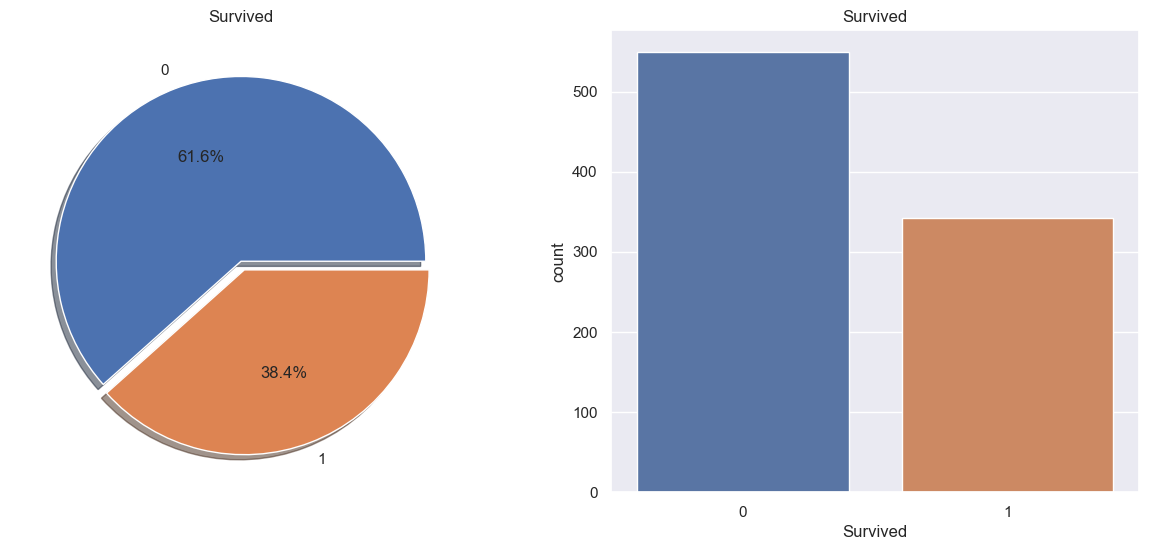

In [14]:
f, ax = plt.subplots(1,2,figsize = (15,6))

train['Survived'].value_counts().plot.pie(explode=[0,0.05],autopct = '%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel("")

sns.countplot('Survived',data=train,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

#### Ordinal or Catagorical feature

In [15]:
pd.crosstab(train.Pclass, train.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


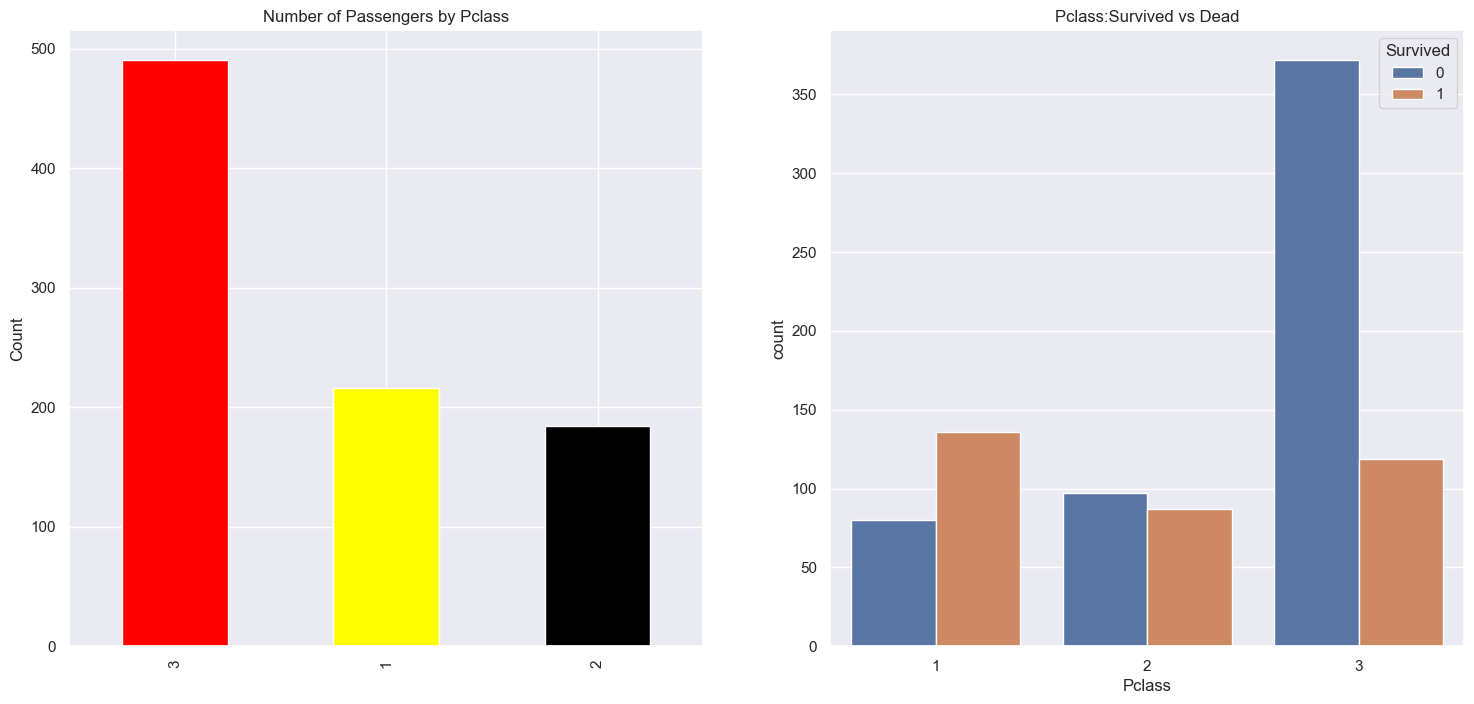

In [16]:
f, ax = plt.subplots(1,2, figsize=(18,8))

train['Pclass'].value_counts().plot.bar(ax=ax[0], color=['red','yellow','black'])
ax[0].set_title("Number of Passengers by Pclass")
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=train, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')

plt.show()

In [17]:
pd.crosstab([train.Sex, train.Survived], train.Pclass, margins = True).style.background_gradient(cmap='summer_r')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


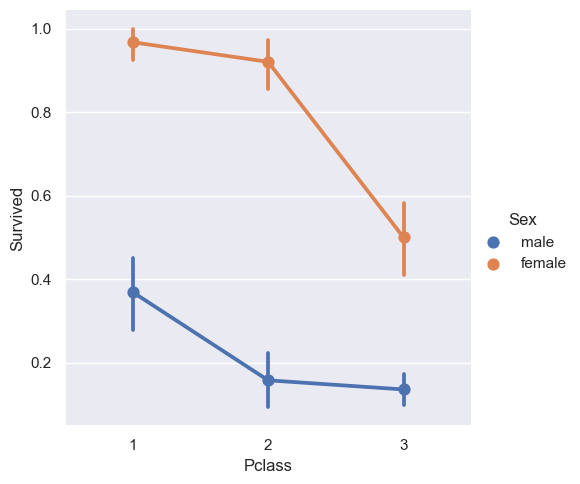

In [18]:
sns.factorplot('Pclass','Survived',hue='Sex',data=train)
plt.show()

#### Continuous Feature

In [19]:
#Checking Ages

old = train['Age'].max()
young = train['Age'].min()
avg = train['Age'].mean()

print(f"Oldest:{old}\nYoungest:{young}\nAverage:{avg}")

Oldest:80.0
Youngest:0.42
Average:29.69911764705882


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


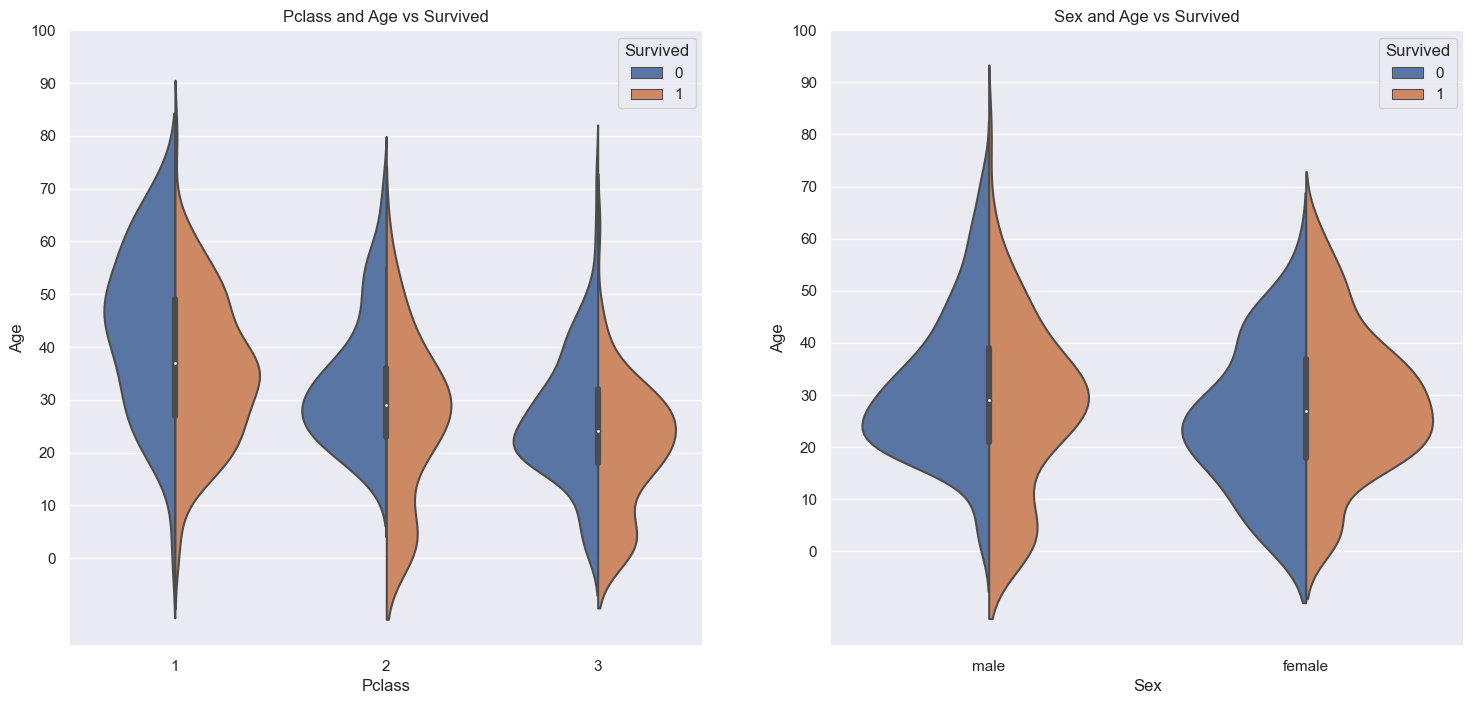

In [20]:
f, ax = plt.subplots(1,2, figsize=(18,8))

sns.violinplot('Pclass','Age', hue='Survived', data=train, split=True, ax=ax[0])
ax[0].set_title("Pclass and Age vs Survived")
ax[0].set_yticks(range(0,110,10))

sns.violinplot('Sex','Age', hue='Survived',split=True, data=train, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))

plt.show()

## Feature Engineering

In [21]:
train_test = [train,test]

for d in train_test:
    d['Title'] = d['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)        #Extracting title
    
#([A-Za-z]+)\. is a regular expression in python (RegEx)

In [22]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [23]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


### Mapping

In [24]:
#Mapping for converting Object data type into Integer form

title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

for d in train_test:
    d['Title'] = d['Title'].map(title_mapping)

In [25]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


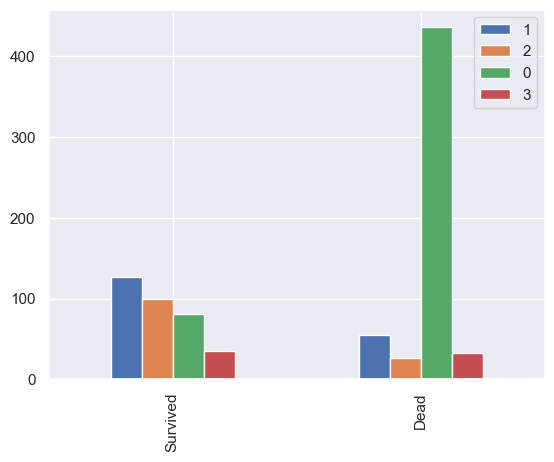

In [26]:
bar_chart('Title')

In [27]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


## Missing Values Handling

In [28]:
#Grouping by Title wise 
#All avg. value of Mr. will be placed in the missing age having Mr. title

grouping = train.groupby("Title")["Age"]

train["Age"].fillna(grouping.transform("mean"),inplace=True)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [29]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

### plotting using seaborn

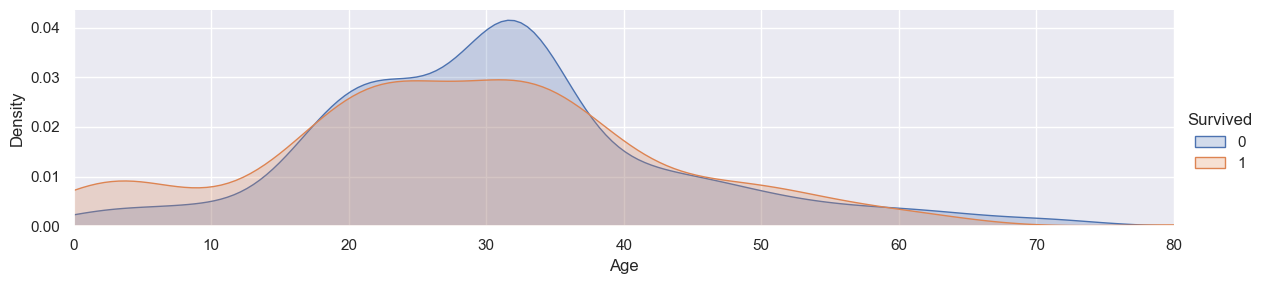

In [30]:
facet = sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()

plt.show()

In [31]:
for dataset in train_test:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 5
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4


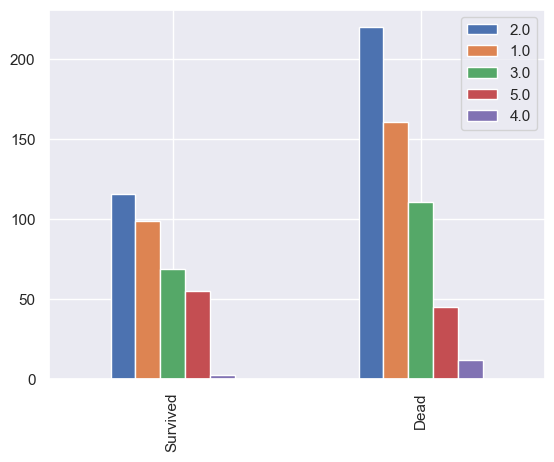

In [32]:
bar_chart('Age')

In [33]:
p1 = train[train['Pclass'] == 1]['Embarked'].value_counts()
p2 = train[train['Pclass'] == 2]['Embarked'].value_counts()
p3 = train[train['Pclass'] == 3]['Embarked'].value_counts()

classes = pd.DataFrame([p1, p2, p3])
classes.index = ['1', '2', '3']
classes.head()

,S,C,Q
1,127,85,2
2,164,17,3
3,353,66,72


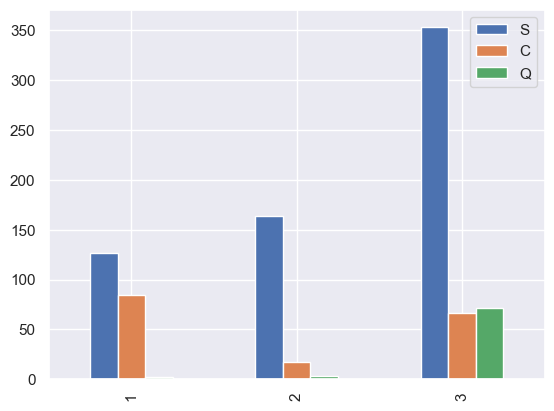

In [34]:
classes.plot(kind='bar')
plt.show()

In [35]:
for d in train_test:
    d["Embarked"] = d["Embarked"].fillna("S")

In [36]:
train.Embarked.isnull().sum()

0

In [37]:
embarked_mapping = {"S":0 , "C":1, "Q":2}

for d in train_test:
    d["Embarked"] = d["Embarked"].map(embarked_mapping)
    
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,female,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,female,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,male,2.0,0,0,373450,8.0500,NaN,0,0


In [38]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [39]:
for d in train_test:
    d["Cabin"] = d["Cabin"].str[:1]
    
p1 = train[train['Pclass'] == 1]['Cabin'].value_counts()
p2 = train[train['Pclass'] == 2]['Cabin'].value_counts()
p3 = train[train['Pclass'] == 3]['Cabin'].value_counts()

cabins = pd.DataFrame([p1, p2, p3])
cabins.index = ['1', '2', '3']
cabins.head()

,C,B,D,E,A,T,F,G
1,59.0,47.0,29.0,25.0,15.0,1.0,NaN,NaN
2,NaN,NaN,4.0,4.0,NaN,NaN,8.0,NaN
3,NaN,NaN,NaN,3.0,NaN,NaN,5.0,4.0


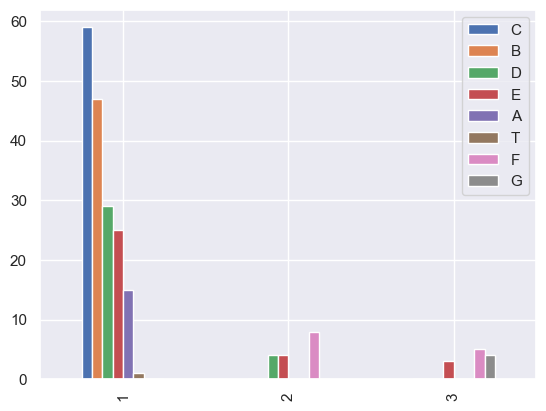

In [40]:
cabins.plot(kind="bar")
plt.show()

In [41]:
cabin_mapping = {"A": 0, "B": 0.5, "C": 1.0, "D": 1.5, "E": 2.0, "F": 2.5, "G": 3.0}

for d in train_test:
    d["Cabin"]=d["Cabin"].map(cabin_mapping)

In [42]:
grouping_class = train.groupby("Pclass")["Cabin"]

train['Cabin'].fillna(grouping_class.transform("median"), inplace=True)

train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

### Creating a new feature named "Family Size"

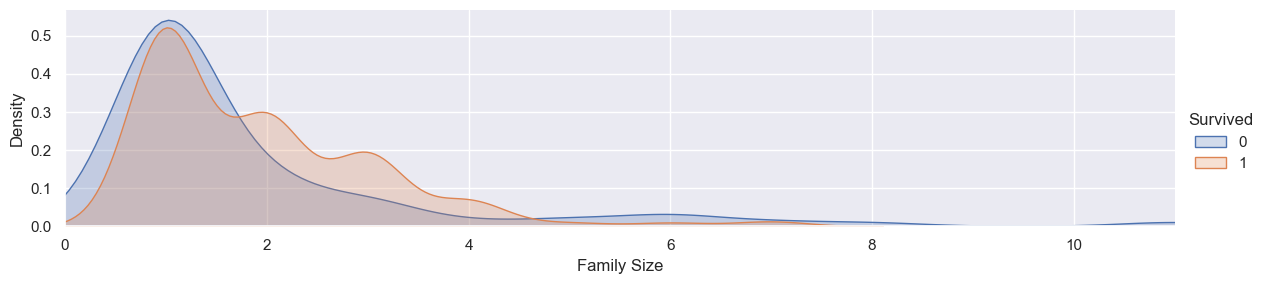

In [43]:
train["Family Size"] = train.SibSp + train.Parch + 1        # +1 for self

facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Family Size' ,shade= True)
facet.set(xlim=(0, train['Family Size'].max()))
facet.add_legend()

plt.show()

In [44]:
train["Family Size"]

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: Family Size, Length: 891, dtype: int64

In [45]:
train["Family Size"].max()

11

In [46]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}

train['Family Size'] = train['Family Size'].map(family_mapping)

In [47]:
sex_mapping = {"male": 0, "female": 1}

train['Sex'] = train['Sex'].map(sex_mapping)

In [48]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family Size
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,2.5,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,1.0,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,2.5,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,53.1000,1.0,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,8.0500,2.5,0,0,0.0


In [49]:
train.drop(['PassengerId', 'Ticket', 'SibSp', 'Parch'], axis=1, inplace=True)
train.shape

(891, 9)

In [50]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family Size
0,0,3,0,1.0,7.2500,2.5,0,0,0.4
1,1,1,1,3.0,71.2833,1.0,1,2,0.4
2,1,3,1,1.0,7.9250,2.5,0,1,0.0
3,1,1,1,2.0,53.1000,1.0,0,2,0.4
4,0,3,0,2.0,8.0500,2.5,0,0,0.0


In [51]:
target = train.Survived
train.drop('Survived', axis = 1, inplace=True)

### Machine Learning Algorithms

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       891 non-null    int64  
 1   Sex          891 non-null    int64  
 2   Age          891 non-null    float64
 3   Fare         891 non-null    float64
 4   Cabin        891 non-null    float64
 5   Embarked     891 non-null    int64  
 6   Title        891 non-null    int64  
 7   Family Size  891 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 55.8 KB


In [53]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [54]:
# Decision Tree

clf_dt = DecisionTreeClassifier()
score = cross_val_score(clf_dt, train, target, cv=k_fold, scoring='accuracy')
score

array([0.78888889, 0.80898876, 0.79775281, 0.7752809 , 0.71910112,
       0.78651685, 0.78651685, 0.82022472, 0.78651685, 0.79775281])

In [55]:
np.mean(score)*100

78.67540574282147

In [56]:
# Random Forest

clf_rf = RandomForestClassifier()
score = cross_val_score(clf_rf, train, target, cv=k_fold, scoring='accuracy')
score

array([0.78888889, 0.83146067, 0.83146067, 0.80898876, 0.84269663,
       0.78651685, 0.80898876, 0.79775281, 0.76404494, 0.80898876])

In [57]:
np.mean(score)*100

80.69787765293383